In [7]:
# !pip install pyhive thrift thrift_sasl pandas seaborn

In [2]:
from pyhive import hive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def fetch(sql, con):
    cursor = conn.cursor()

    cursor.execute(sql)
    df = pd.DataFrame(cursor.fetchall(), columns=[col[0].split('.')[1] for col in cursor.description])

    cursor.close()
    return df

In [4]:
conn = hive.Connection(host='hiveserver2', port=10000)

cursor = conn.cursor()

hotel_oraclenosql = fetch("SELECT * FROM hotel_oraclenosql", conn)
hotel_review_oraclenosql = fetch("SELECT * FROM hotel_review_oraclenosql", conn)

conn.close()

In [5]:
ORACLE = pd.merge(hotel_oraclenosql, hotel_review_oraclenosql, on="hotel_id", how="outer")
ORACLE["review_date"] = pd.to_datetime(ORACLE["review_date"])
ORACLE["year_month"] = ORACLE["review_date"].dt.strftime("%Y_%m_%B")

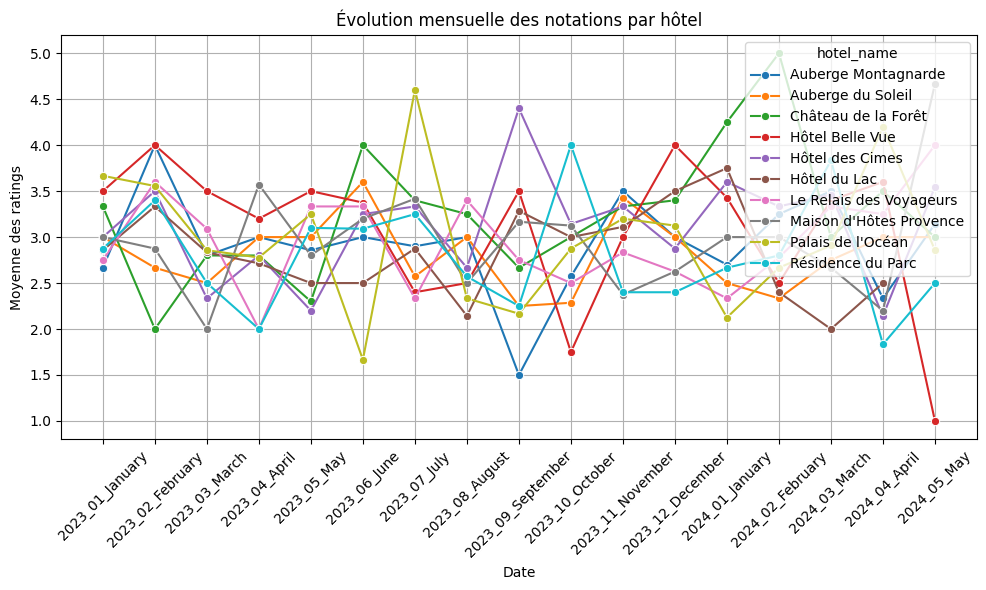

In [6]:
STAT1 = ORACLE.groupby(["hotel_name", "year_month"]).agg({
    "rating" : "mean"
}).reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=STAT1, x='year_month', y='rating', hue='hotel_name', marker='o')

plt.title('Évolution mensuelle des notations par hôtel')
plt.xlabel('Date')
plt.ylabel('Moyenne des ratings')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()